In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.rcParams["figure.figsize"]
fig[0] = 10
fig[1] = 6

In [3]:
df1 = pd.read_csv('data/commutedata_sum.csv')
df1.head()

,state,totalCommuters,outofcountyCommuters,percent_leaving
0,Alabama,1945413,507024,0.260625
1,Alaska,346577,22846,0.065919
2,Arizona,2672262,152097,0.056917
3,Arkansas,1204964,283593,0.235354
4,California,16251766,2777204,0.170886


In [4]:
df = pd.read_csv('data/commutedata_travel.csv')
df.head()

,state,total_commuters,outofcounty_commuters,percent_leaving,travel_mode
0,Alabama,189117,57560,0.304362,"Car, truck, or van: Carpooled"
1,Alaska,44833,4339,0.096781,"Car, truck, or van: Carpooled"
2,Arizona,306070,23061,0.075346,"Car, truck, or van: Carpooled"
3,Arkansas,132651,36749,0.277035,"Car, truck, or van: Carpooled"
4,California,1837784,397014,0.216029,"Car, truck, or van: Carpooled"


In [6]:
df['percent_leaving']=df['outofcounty_commuters']/df['total_commuters']

In [28]:
df1.dtypes
print(min(df1['percent_leaving']))
print(max(df1['percent_leaving']))

0.008253132
0.51018187


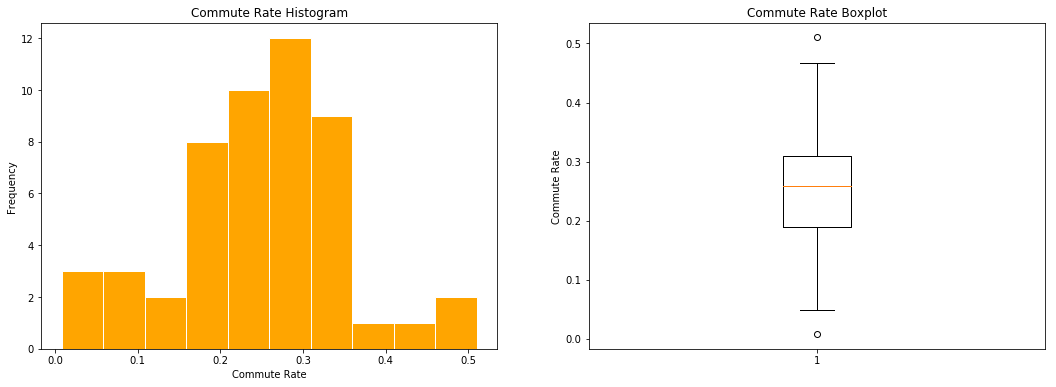

In [37]:
fig = plt.figure(figsize=(18, 6))
# binwidth = np.linspace(0,0.6,0.04)

ax1 = fig.add_subplot(121)
ax1.hist(df1['percent_leaving'],color='orange',edgecolor="white")
ax1.set_title('Commute Rate Histogram')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Commute Rate')

ax2 = fig.add_subplot(122)
ax2.boxplot(df1['percent_leaving'])
ax2.set_title('Commute Rate Boxplot')
ax2.set_ylabel('Commute Rate')
ax2.set_xlabel('')

plt.show()

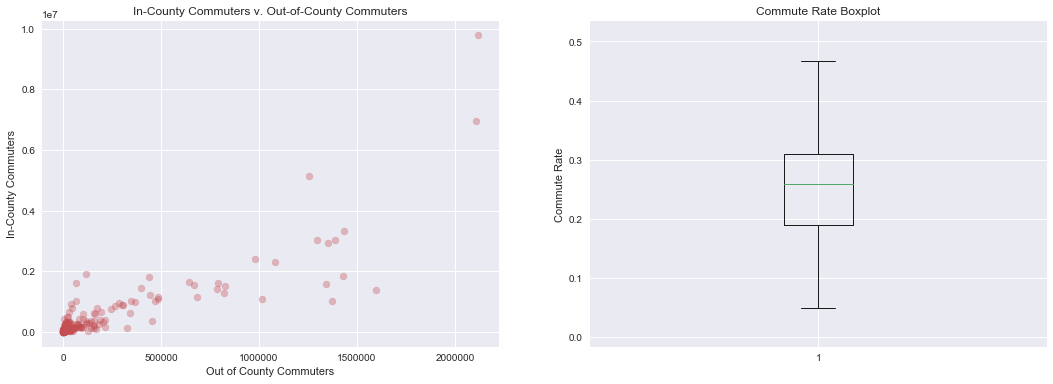

In [102]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(122)
ax1.boxplot(df1['percent_leaving'])
ax1.set_title('Commute Rate Boxplot')
ax1.set_ylabel('Commute Rate')
ax1.set_xlabel('')

df['incounty_commuters'] = df['total_commuters']-df['outofcounty_commuters']

ax2 = fig.add_subplot(121)
ax2.scatter(df['outofcounty_commuters'],df['incounty_commuters'],alpha=0.35,color='r')
ax2.set_title('In-County Commuters v. Out-of-County Commuters')
ax2.set_ylabel('In-County Commuters')
ax2.set_xlabel('Out of County Commuters')

plt.show()

In [103]:
df.head()

,state,total_commuters,outofcounty_commuters,percent_leaving,travel_mode,incounty_commuters
0,Alabama,189117,57560,0.304362,"Car, truck, or van: Carpooled",131557
1,Alaska,44833,4339,0.096781,"Car, truck, or van: Carpooled",40494
2,Arizona,306070,23061,0.075346,"Car, truck, or van: Carpooled",283009
3,Arkansas,132651,36749,0.277035,"Car, truck, or van: Carpooled",95902
4,California,1837784,397014,0.216029,"Car, truck, or van: Carpooled",1440770


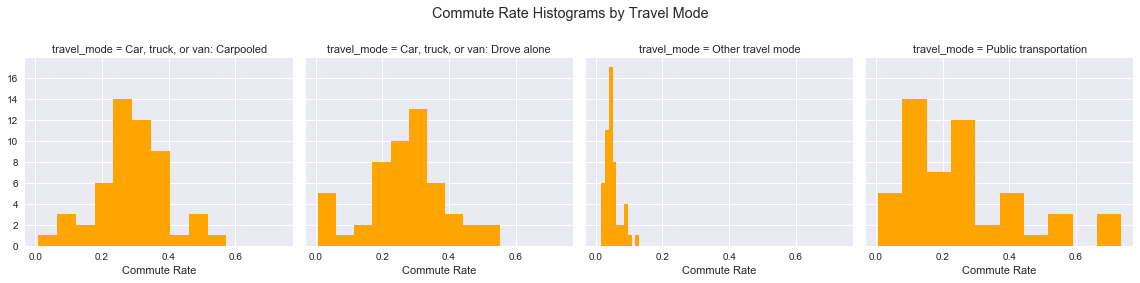

In [100]:
import seaborn as sns

# sns.plt.title('Ratings by Network Histogram') 
sns.set(style="darkgrid", color_codes=True)
g = sns.FacetGrid(df, col="travel_mode",legend_out=False,size=4, aspect=1, margin_titles=True)
g = g.map(plt.hist, "percent_leaving", color="orange")

# sns.plt.title("Out-of-County Commuters by Travel Modes")
# g.set_xlabel("Total Out-of-County Commuters")
# g.set_ylabel("Travel Mode")
g.axes[0,0].set_xlabel('Commute Rate')
g.axes[0,1].set_xlabel('Commute Rate')
g.axes[0,2].set_xlabel('Commute Rate')
g.axes[0,3].set_xlabel('Commute Rate')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Commute Rate Histograms by Travel Mode')
sns.plt.show()

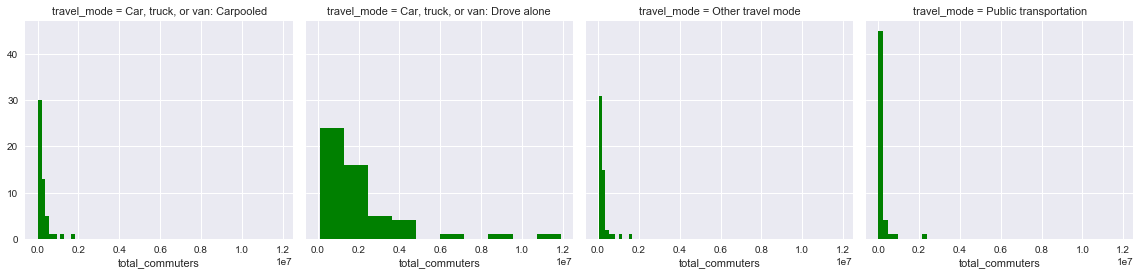

In [11]:
sns.set(style="darkgrid", color_codes=True)
g = sns.FacetGrid(df, col="travel_mode",legend_out=False,size=4, aspect=1)
g = g.map(plt.hist, "total_commuters", color="green")
sns.plt.show()

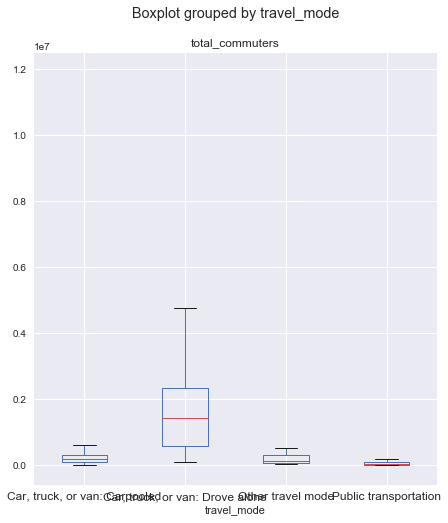

In [12]:
df.boxplot('total_commuters', by='travel_mode', figsize=(7, 8))

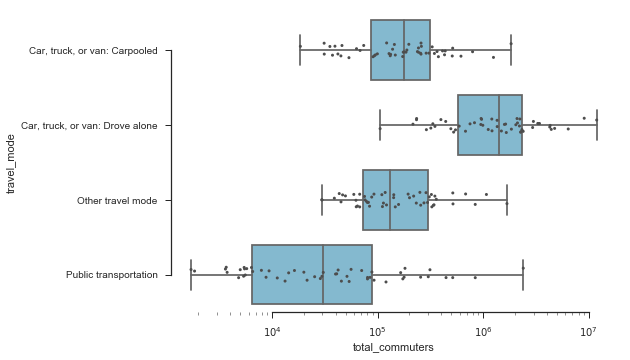

In [15]:
sns.set(style="ticks", palette="muted", color_codes=True)

ax = sns.boxplot(x="total_commuters", y="travel_mode", data=df,
                 whis=np.inf, color="c")

sns.stripplot(x="total_commuters", y="travel_mode", data=df,
              jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(trim=True)

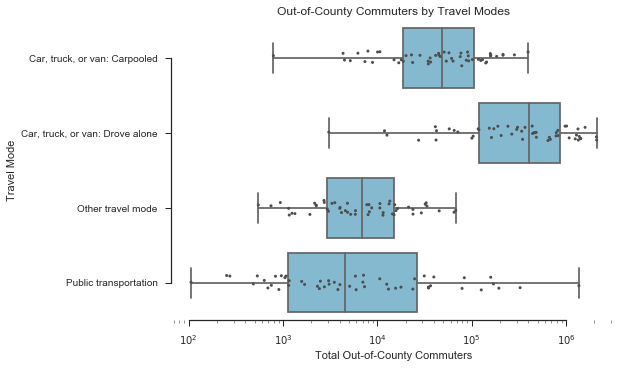

In [80]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="outofcounty_commuters", y="travel_mode", data=df,
                 whis=np.inf, color="c")
sns.stripplot(x="outofcounty_commuters", y="travel_mode", data=df,
              jitter=True, size=3, color=".3", linewidth=0)
ax.set_title("Out-of-County Commuters by Travel Modes")
ax.set_xlabel("Total Out-of-County Commuters")
ax.set_ylabel("Travel Mode")
ax.set_xscale("log")
sns.despine(trim=True)

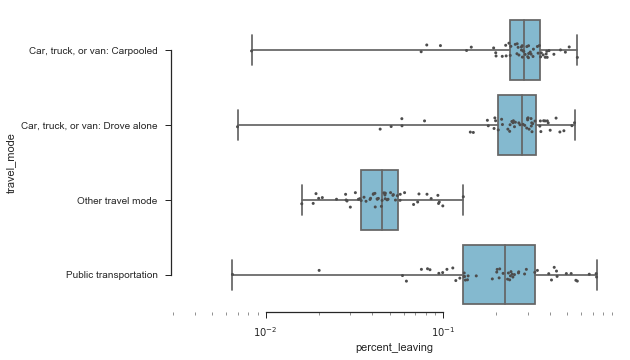

In [26]:
sns.set(style="ticks", palette="muted", color_codes=True)

ax = sns.boxplot(x="percent_leaving", y="travel_mode", data=df,
                 whis=np.inf, color="c")

sns.stripplot(x="percent_leaving", y="travel_mode", data=df,
              jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(trim=True)

In [39]:
df_carpooled = df.loc[df['travel_mode'] == 'Car, truck, or van: Carpooled']
df_alone = df.loc[df['travel_mode'] == 'Car, truck, or van: Drove alone']
df_other = df.loc[df['travel_mode'] == 'Other travel mode']
df_public = df.loc[df['travel_mode'] == 'Public transportation']

/Users/moorissatjokro/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


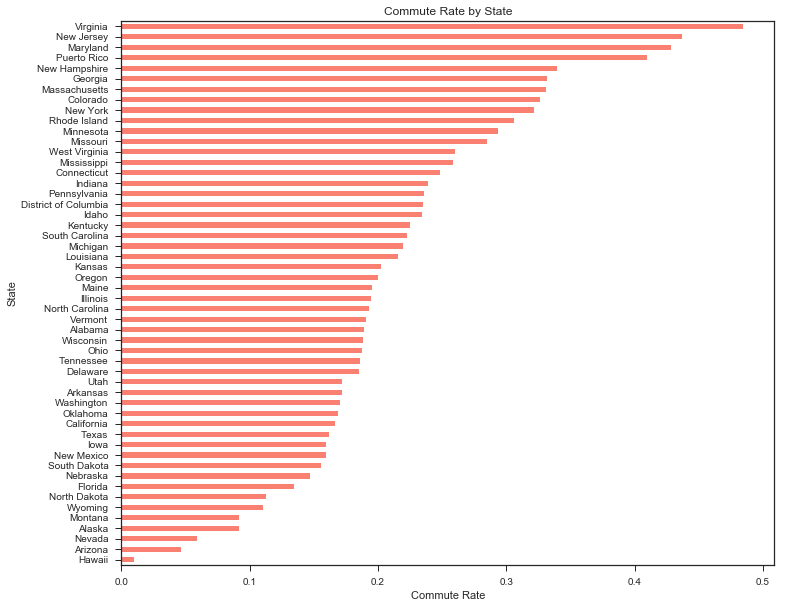

In [33]:
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(11.7, 10))
show_group = df[['state','percent_leaving']].groupby('state')
ratings_group = show_group.mean()
my_plot = ratings_group.sort(columns='percent_leaving',ascending=True)
my_plot = my_plot.plot(ax=ax,kind='barh',legend=None,color='salmon',title="Commute Rate by State")

my_plot.set_ylabel("State")
my_plot.set_xlabel("Commute Rate")
plt.show()

/Users/moorissatjokro/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/moorissatjokro/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/moorissatjokro/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/moorissatjokro/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:33: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


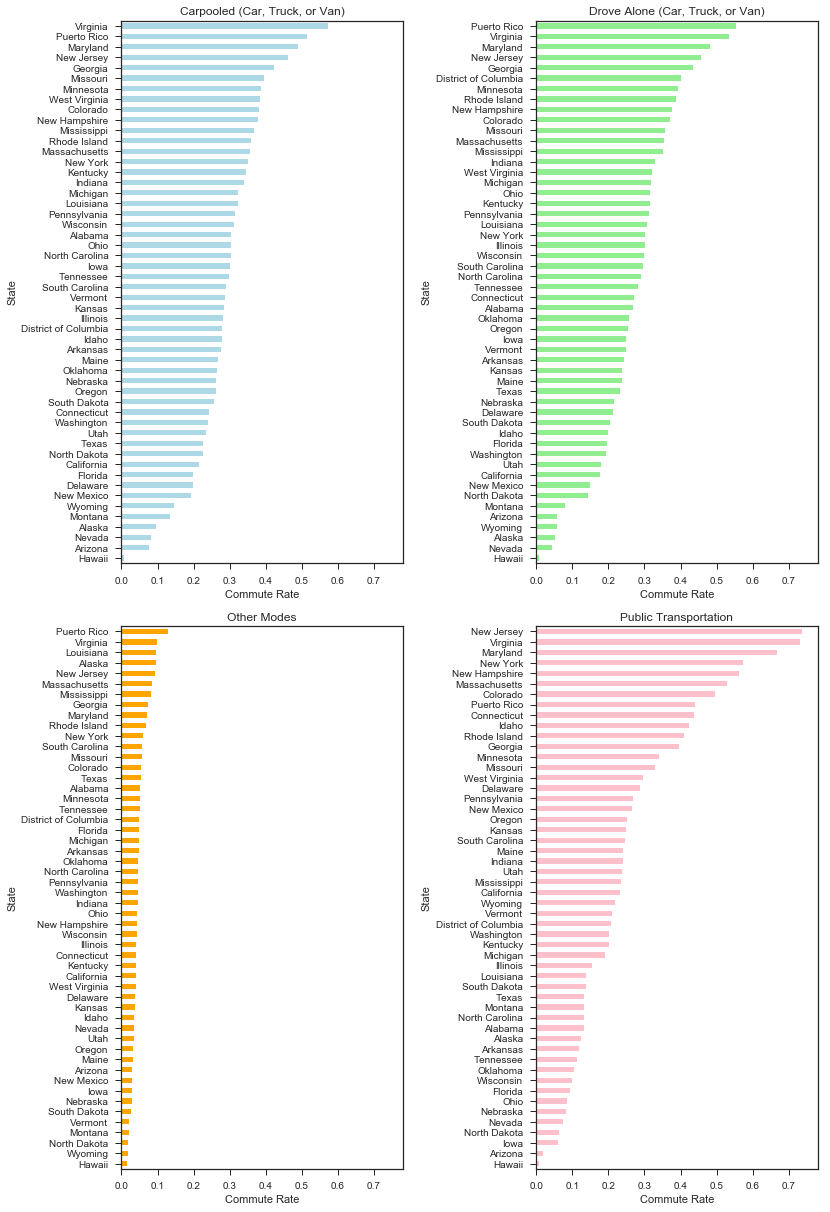

In [74]:
fig = plt.figure(figsize=(11.7, 17))

ax1 = fig.add_subplot(221)
show_group = df_carpooled[['state','percent_leaving']].groupby('state')
ratings_group = show_group.mean()
my_plot = ratings_group.sort(columns='percent_leaving',ascending=True)
my_plot = my_plot.plot(ax=ax1,kind='barh',legend=None,color='lightblue',title="Carpooled (Car, Truck, or Van)")
my_plot.set_xlim([0,0.78])
my_plot.set_ylabel("State")
my_plot.set_xlabel("Commute Rate")

ax2 = fig.add_subplot(222)
show_group = df_alone[['state','percent_leaving']].groupby('state')
ratings_group = show_group.mean()
my_plot = ratings_group.sort(columns='percent_leaving',ascending=True)
my_plot = my_plot.plot(ax=ax2,kind='barh',legend=None,color='lightgreen',title="Drove Alone (Car, Truck, or Van)")
my_plot.set_xlim([0,0.78])
my_plot.set_ylabel("State")
my_plot.set_xlabel("Commute Rate")

ax3 = fig.add_subplot(223)
show_group = df_other[['state','percent_leaving']].groupby('state')
ratings_group = show_group.mean()
my_plot = ratings_group.sort(columns='percent_leaving',ascending=True)
my_plot = my_plot.plot(ax=ax3,kind='barh',legend=None,color='orange',title="Other Modes")
my_plot.set_xlim([0,0.78])
my_plot.set_ylabel("State")
my_plot.set_xlabel("Commute Rate")

ax4 = fig.add_subplot(224)
show_group = df_public[['state','percent_leaving']].groupby('state')
ratings_group = show_group.mean()
my_plot = ratings_group.sort(columns='percent_leaving',ascending=True)
my_plot = my_plot.plot(ax=ax4,kind='barh',legend=None,color='pink',title="Public Transportation")
my_plot.set_ylabel("State")
my_plot.set_xlabel("Commute Rate")
my_plot.set_xlim([0,0.78])

fig.tight_layout()
plt.show()